# Adding shapes / graphic overlays

There are two supported representations of exact shapes in `ipyaladin`:
 - the [Space Time Coordinates string (STCs)](https://ivoa.net/documents/STC-S/20130917/index.html)
 - the `astropy-regions` package objects

If you're looking for MOCs, they have their own example in the repository: `5-Display_a_MOC.ipynb`.

In [1]:
from ipyaladin import Aladin

from astropy.coordinates import Angle, SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from regions import (
    CircleSkyRegion,
    EllipseSkyRegion,
    LineSkyRegion,
    PolygonSkyRegion,
    RectangleSkyRegion,
    RegionVisual,
)

## Add shapes from Space-Time Coordinates (STC)

For now, `ipyaladin` supports a subset of STCs shapes and frames: the circles and polygons in frames `icrs`, `j2000`, and `fk5`.

Operations between shapes (union, intersection, ...) are not supported, but lists of shapes in a same STC string do work.

In [2]:
aladin = Aladin(target="M 51", fov=1.2)
aladin

Aladin()

In [3]:
aladin.add_graphic_overlay_from_stcs(
    """Polygon ICRS 202.63748 47.24951 202.46382 47.32391 202.46379 47.32391 202.45459
    47.32391 202.34527 47.20597 202.34527 47.20596 202.34529 47.19710 202.51870
    47.12286 202.52789 47.12286 202.52791 47.12286 202.63746 47.24063 202.63749
    47.24949\nPolygon J2000 202.74977 47.36958 202.57592 47.44415 202.57585 47.44416
    202.56666 47.44416 202.45683 47.32632 202.45683 47.31746 202.63051 47.24302
    202.63970 47.24302 202.74978 47.36069 202.74982 47.36955\nPolygon J2000 202.52540
    47.12904 202.35192 47.20325 202.34273 47.20325 202.23391 47.08518 202.23395
    47.07633 202.23398 47.07630 202.40715 47.00227 202.40721 47.00226 202.41640
    47.00226 202.52539 47.12018""",
    color="red",
)
aladin.add_graphic_overlay_from_stcs(
    "Circle ICRS 202.4656816 +47.1999842 0.04", color="#4488ee"
)

## Add shapes from astropy-regions objects

The ipyaladin widget can also represent the following [`astropy-regions`](https://astropy-regions.readthedocs.io) shapes:
- `CircleSkyRegion`,
- `EllipseSkyRegion`,
- `LineSkyRegion`,
- `PolygonSkyRegion`,
- `RectangleSkyRegion`.

Let's create one of each:

In [4]:
center = SkyCoord.from_name("M31")
circle = CircleSkyRegion(
    center=center, radius=Angle(0.5, "deg"), visual={"edgecolor": "yellow"}
)
ellipse = EllipseSkyRegion(
    center=center,
    height=Angle(0.5, "deg"),
    width=Angle(1, "deg"),
    angle=Angle(45, "deg"),
    visual=RegionVisual(edgecolor="red"),
)
line = LineSkyRegion(
    start=center,
    end=center.directional_offset_by(Angle(0, "deg"), Angle(0.5, "deg")),
    visual=RegionVisual(edgecolor="green"),
)
polygon = PolygonSkyRegion(
    vertices=SkyCoord(
        [
            center.directional_offset_by(Angle(0, "deg"), Angle(0.5, "deg")),
            center.directional_offset_by(Angle(90, "deg"), Angle(0.5, "deg")),
            center.directional_offset_by(Angle(-90, "deg"), Angle(0.5, "deg")),
        ],
        frame="icrs",
        unit="deg",
    ),
    visual={"edgecolor": "blue"},
)
rectangle = RectangleSkyRegion(
    center=center,
    width=Angle(1, "deg"),
    height=Angle(1, "deg"),
    angle=Angle(45, "deg"),
    visual=RegionVisual(color="purple"),
)

And plot them first with matplotlib

Filename: images/m31.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (1200, 900, 3)   uint8   


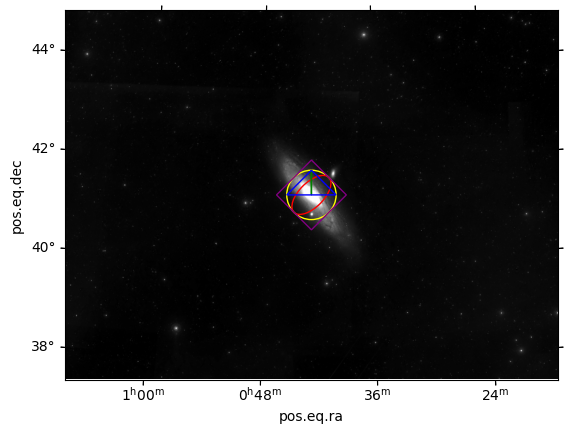

In [5]:
hdu_list = fits.open("images/m31.fits")
hdu_list.info()
wcs = WCS(hdu_list[0].header).dropaxis(2)

plt.subplot(projection=wcs)
plt.imshow(hdu_list[0].data[0, :, :], cmap="gray")

circle.to_pixel(wcs).plot(ax=plt.gca())
ellipse.to_pixel(wcs).plot(ax=plt.gca())
line.to_pixel(wcs).plot(ax=plt.gca())
polygon.to_pixel(wcs).plot(ax=plt.gca())
rectangle.to_pixel(wcs).plot(ax=plt.gca())

And now in ipyaladin

In [6]:
aladin = Aladin(target="m31", fov=10)
aladin

Aladin()

In [7]:
aladin.add_graphic_overlay_from_region([circle, ellipse, line, polygon, rectangle])